# Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

<div class="alert alert-warning alert-warning"><b><u>Important</u></b>

El resultat final ha de ser un dataframe amb les variables de **_nom_ de la _pel·lícula_, _any_ i _genere_**. També és important quedar-se amb un sol gènere per a cada pel·lícula!
</div>

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### El que se'ns demana és treballar amb el datset 'movies.dat'. Doncs, des d'aqui comencem el desenvolupament de l'exercici.

Primer de tot, descarreguem l'arxiu dins de la nostra carpeta on estem treballant. Podrem veure que l'antepenúltim arxiu de la llista correspon a 'movies.dat'.

In [2]:
os.listdir(os.curdir)

['.ipynb_checkpoints',
 '03 EXAMINING DATA - Copy.ipynb',
 'cars.txt',
 'County%20codebook.GIF',
 'county.txt',
 'email50.txt',
 'Examining-Data-main',
 'Exercici 2 i 3.ipynb',
 'Modal%20Distribution_small.JPG',
 'movies.dat',
 'PRE-PROCESSING-DATA-main',
 'print_movies_github.GIF',
 'Std.JPG']

Si fem un cop d'ull a l'arxiu des del github des d'on l'hem extret, podrem veure el següent:

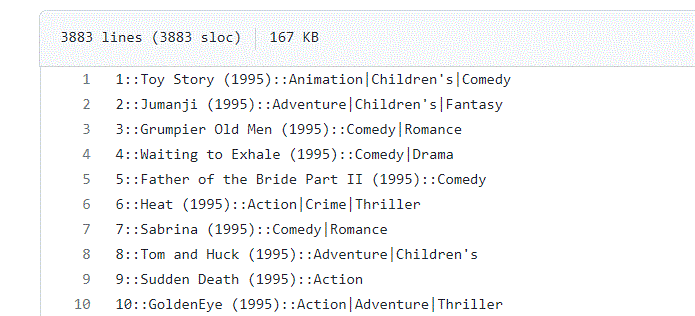

In [3]:
from IPython.display import Image

Image(filename='print_movies_github.GIF')

Com el fitxer té una extensió .dat i tota la informació ens ve sense estructura, no podrem llegir l'arxiu com ho fem normalment com un csv amb el delimeter per no tenir una codificació UTF-8 (una de les mes utilitzades). 

Per un altre banda, si ens fixem en la imatge anterior, podem veure que les dades estan separades per '::'. Doncs podem identificar 3 columnes; index, nom de la pel·lícula + l'any i el genere). Doncs, llegirem l'arxiu movies.dat i el carregarem en un objecte de pandas Dataframe. Separarem les columnes descrites anteriorment i les anomenarem.

frem servir una de les codificacions més utilizades, separararem pels punts dobles, farem servir el motor d'anàlisi de Pyhton, s'ingressarà ina llista de tres noms i finalment s'assignarà com index a la columne 'id'.

In [4]:
mov2 = pd.read_csv('movies.dat', sep ='::', encoding = 'ISO-8859-1', engine='python', names = ['id', 'nom_any', 'genere'], index_col='id')
mov2

,nom_any,genere
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


Ara el que farem serà extreure només l'any de la  columna 'nom_any' i el posarem en una nova columna que s'anomenarà 'Any'. Pel que fa el nom, doncs eliminarem l'any de la columna nom_any i ens quedarem només amb el seu nom. Desprès canviarem el nom de la columna 'nom_any' per 'nom'. 

In [5]:
#creem 'any'
mov2['any'] = mov2.nom_any.str.slice(-5,-1)
mov2

,nom_any,genere,any
id,,,
1,Toy Story (1995),Animation|Children's|Comedy,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama,1995
5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
3948,Meet the Parents (2000),Comedy,2000
3949,Requiem for a Dream (2000),Drama,2000
3950,Tigerland (2000),Drama,2000


In [6]:
# modifiquem 'nom_any' per 'nom'
mov2['nom_any'] = mov2.nom_any.str.slice(0,-6)
mov2

,nom_any,genere,any
id,,,
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000


In [7]:
# canviem el 'nom_any' per 'any'
mov2 = mov2.rename(columns={'nom_any':'nom'})
mov2

,nom,genere,any
id,,,
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000


Ara dividirem els valors de la columne 'genere' perquè es considerin tots els gèneres per separat. Farem servir el separador '|'.

In [8]:
mov2['genere']=mov2.genere.str.split('|')
mov2.head()

,nom,genere,any
id,,,
1,Toy Story,"[Animation, Children's, Comedy]",1995
2,Jumanji,"[Adventure, Children's, Fantasy]",1995
3,Grumpier Old Men,"[Comedy, Romance]",1995
4,Waiting to Exhale,"[Comedy, Drama]",1995
5,Father of the Bride Part II,[Comedy],1995


#### Se'ns sol·licita que ens quedem només amb un gènere per pel·lícula. per tant, triarem el primer gènere de cadascuna.

Per això el que farem serà escollir el primer índex (índex 0), i d'questa manera quedar-nos només amb el primer gènere. 

Accedim el primer element de cada valor de la columna i després netegem qualsevol espai en blanc al principi i al final de cada valor de la columna. D'aquesta manera ens assegurem que els valors quedin nets i uniformes.

In [9]:
mov2['genere']=mov2.genere.str[0].str.strip()
mov2.head(10)

,nom,genere,any
id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action,1995
7,Sabrina,Comedy,1995
8,Tom and Huck,Adventure,1995
9,Sudden Death,Action,1995


# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

#### Ara que ja tenim la base de dades com se'ns demanava, farem una ràpida inspecció del dataframe per no trobar-nos amb errors posteriors el moment de fer la representació gràfica.

In [10]:
mov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nom     3883 non-null   object
 1   genere  3883 non-null   object
 2   any     3883 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


#### Veiem que la columne ''any' és un objecte, mentre que les seves dades són numèriques. Per tant, canviarem el tipus de dade per numèriques (integer). Aprofitarem per especificar que si troba errors a la seva columna que els posi com a *nan's*.

In [13]:
mov2['any'] = pd.to_numeric(mov2['any'], errors = 'coerce')
mov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nom     3883 non-null   object
 1   genere  3883 non-null   object
 2   any     3883 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


#### Busquem si hi ha dades 'nulls'

In [15]:
mov2.isnull().sum()

nom       0
genere    0
any       0
dtype: int64

##### Com ja sabem, a la base hi ha molts generes, per tant sembla interessant veure quina és la diversitat d'quests.

In [36]:
mov2['genere'].value_counts().sort_values(ascending=False)

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: genere, dtype: int64

##### Una manera per poder veure la distribució d'aquestes dades és a través d'un gràfic de barres. Les barres ens aportaran una visualització fàcil y senzilla per poder veure, quines són els generes qué més freqüencia porten.

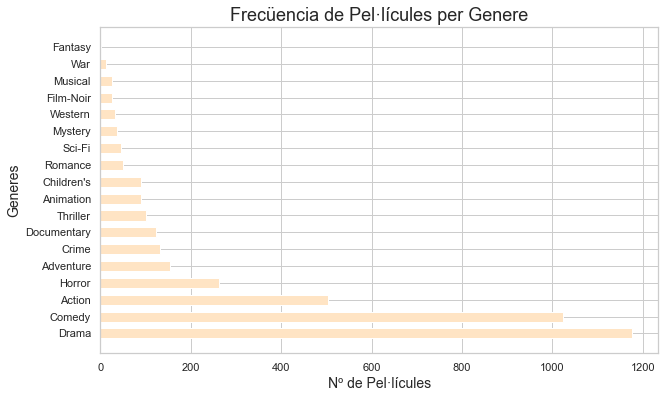

In [47]:
freq_genere = mov2['genere'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(freq_genere.index, freq_genere.values, height=0.6, color='#FFE4C4')
ax.set_title('Frecüencia de Pel·lícules per Genere', fontsize=18)
ax.set_xlabel('Nº de Pel·lícules', fontsize=14)
ax.set_ylabel('Generes', fontsize=14)

plt.show()

##### Ara podriem fer el mateix que amb els generes, però amb els anys de producció de les pel·lícules. Si volguéssim tenir una visualització clara i rápida dels periódes del últim segle (d'acord el datset en qüestió) on s'han produït les majores concentracions de pel·lícules, una molt bona alternativa seria fer una estimació a partir d'un 'kernel density estimate plot' .

Text(0.5, 0, 'Període de Temps')

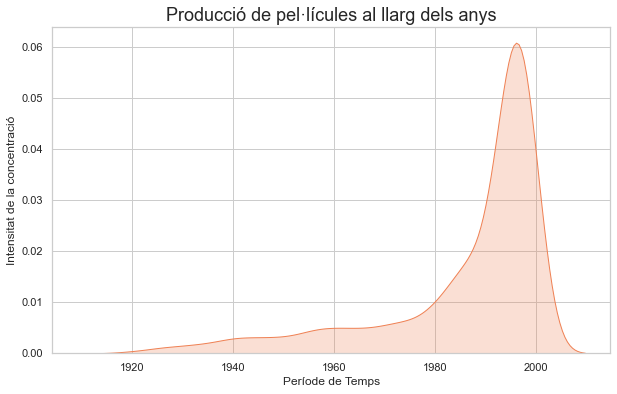

In [53]:
fig, ax = plt.subplots(figsize=(10,6))


sns.kdeplot(mov2['any'], shade=True, color='#EF8154')
sns.set(style= "whitegrid")
plt.title('Producció de pel·lícules al llarg dels anys', size=18)
plt.ylabel('Intensitat de la concentració')
plt.xlabel('Període de Temps')


##### Ara afagirem un últim gràfic on visualitzarem la variable 'genere' i la variable 'any' simultàneament. La idea és veure com és la distribució de les pel·lícules dins d'un genere durant els anys.

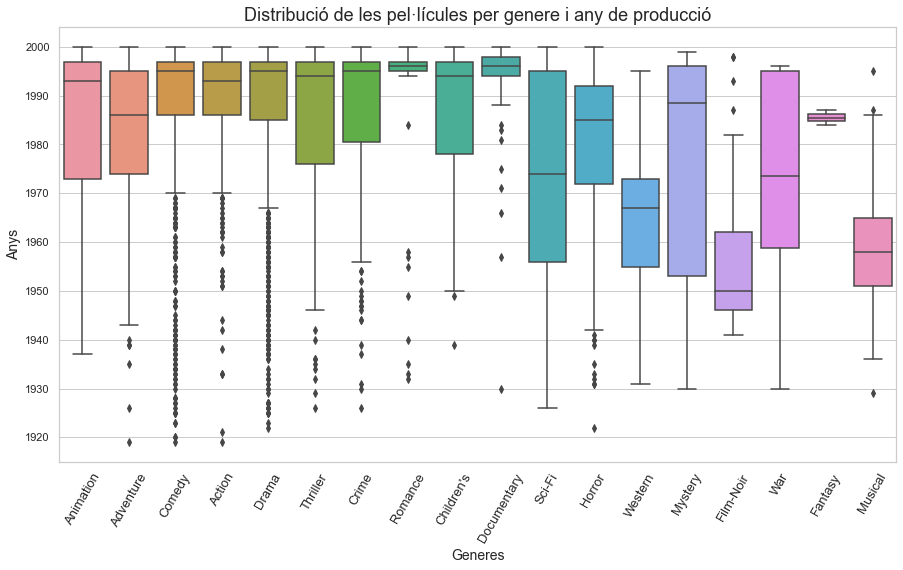

In [63]:
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(x=mov2['genere'], y=mov2['any'], data=mov2)
plt.title('Distribució de les pel·lícules per genere i any de producció', size=18)
plt.ylabel('Anys', fontsize=14)
plt.xlabel('Generes', fontsize=14)
plt.xticks(fontsize=13, rotation = 60)


plt.show()

#### Aquest és un dels meus gràfics preferits perquè ens dona molta informació i serveix per generar moltes interpretacions. Així mateix, per fer la caracterització més ordenada puntualitzarem cada comentari dins d'una línia segons el criteri.

**1**. La primera cosa que em crida l'atenció és com es reflecteix una dilatada distribució en el temps dels generes que sempre hem escoltat, encara que no tinguin la major freqüencia de pel·lícules com per exemple; War, Sci-Fi, Mystery. És a dir, que aquests generes els podem trobar practicament en totes les dècades.

**2**. Per un altre banda, tenim un primer grup de generes com; Animation, Adventure, Comedy, Action, Drama, thriller i Crime que com ja hem vist abans porten la major freqüencia de les pel·lícules. Totes amb una mitjana molt clara aprop de l'any 95' (excepte 'Adventure') i concentrades també entre les dècades de finals del 80' i 90'. Per tant, el que ens mostra el gràfic en aquests generes és poca dispersió dins dels quartils intermedis (q2 i q3).

**3**. Una cosa molt evident i que quedarà per un altre moment, són les dades atípiques precissament dels generes amb més freqüencia (com hem vist anteriorment).

**4**. Finalment podem dir que per aquest dataset, la meïtat esquerra del gràfic (pràcticament) representa els generes més populars de l'actualitat (baixa dispersió), mentre que la segona meïtat dreta del gràfic ens mostra els generes que podriam trobar avui mateix en plataformas no tan *mainstream* com 'Filmin', on les pel·lícules presentan dates molt més antigues i per tant, podem trobar-les en diverses dècades.